In [1]:
import numpy as np
import random

# For loading and displaying images
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Visualizations will be shown in the notebook.
%matplotlib inline

# OpenCV for image manipulation
import cv2

# Pandas for loading csv files and dataframes
import pandas as pd

In [2]:
import os
import platform

In [3]:
os_type = platform.system()
print(os_type)

joiner = '/'

if os_type == 'Windows':
    joiner = '\\'

path = os.getcwd()
print(path)


data_path = path + joiner + r'data' + joiner
data_log_path = data_path + r'driving_log.csv'
images_path = data_path + r'IMG'


print(data_log_path,images_path)

Windows
C:\Users\avinash\version-control\SDC\term1\P3
C:\Users\avinash\version-control\SDC\term1\P3\data\driving_log.csv C:\Users\avinash\version-control\SDC\term1\P3\data\IMG


In [4]:
data_log = pd.read_csv(data_log_path)

print(data_log.describe())

          steering     throttle        brake        speed
count  8036.000000  8036.000000  8036.000000  8036.000000
mean      0.004070     0.869660     0.001970    28.169839
std       0.128840     0.301326     0.036565     6.149327
min      -0.942695     0.000000     0.000000     0.502490
25%       0.000000     0.985533     0.000000    30.183093
50%       0.000000     0.985533     0.000000    30.186400
75%       0.000000     0.985533     0.000000    30.186640
max       1.000000     0.985533     1.000000    30.709360


In [53]:
new_height,new_width,channels = 66,200,3 #global variables
import math

In [75]:
def get_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

def get_resized_img(img):
    img = cv2.resize(img,(new_width,new_height),interpolation=cv2.INTER_AREA)
    return img

def crop_img(img):
    height = img.shape[0]
    width = img.shape[1]
    top = math.floor(height/5)
    bottom = height - 25
    img = img[top:bottom]
    return img


def preprocess_images(row_data,validation = False):
    # Get paths
    selector = np.random.randint(3)
    
    # zero for left
    if selector == 0:
        img_path = data_path + row_data.iloc[0]['left'].strip()
        shift_ang = .25
        
    # one for center
    elif selector == 1:
        img_path = data_path + row_data.iloc[0]['center'].strip()
        shift_ang = 0.
        
    # two for right
    else:
        img_path = data_path + row_data.iloc[0]['right'].strip()
        shift_ang = -.25
    
    img = get_img(img_path)
    img = crop_img(img)
    img = get_resized_img(img)
    
    steering = row_data.iloc[0]['steering']
    print(steering)
    
    steering = steering + shift_ang
    
    if validation:
        return img,steering
    
    return img,steering

0.0
0.25


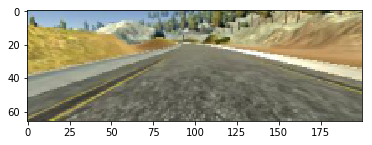

In [76]:
length_of_data = len(data_log)
selector = np.random.randint(length_of_data)
row_data = data_log.iloc[[selector]]
x,y = preprocess_images(row_data)
print(y)
plt.imshow(x)


In [ ]:
def get_resized_img(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img,(new_width,new_height),interpolation=cv2.INTER_AREA)
    return img

def preprocess_images(row_data,validation = False):
    # Get paths
    l_img_path = data_path + row_data.iloc[0]['left'].strip()
    shift_ang = .25
    c_img_path = data_path + row_data.iloc[0]['center'].strip()
    r_img_path = data_path + row_data.iloc[0]['right'].strip()
    
    img = get_resized_img(c_img_path)
    
    if validation:
        return img
    
    return img